## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.800565 -0.727308 -0.724400  1.015293  0.070483 -0.115365
1 -0.449651  1.428762  0.003768 -1.429992  1.250445 -0.196813
2  1.507052 -0.948708 -0.710900 -1.298646  0.669302 -0.659277
3 -1.633519  0.687488 -0.458335 -0.624152 -1.402510 -1.947784
4 -0.715024  0.762602  0.906710  0.258443  1.253514  0.673874


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9480899	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9368887	total: 47.2ms	remaining: 23.5s
2:	learn: 0.9258578	total: 47.6ms	remaining: 15.8s
3:	learn: 0.9153876	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9059866	total: 48.3ms	remaining: 9.61s
5:	learn: 0.8959877	total: 48.7ms	remaining: 8.06s
6:	learn: 0.8845857	total: 49.1ms	remaining: 6.96s
7:	learn: 0.8755841	total: 49.4ms	remaining: 6.13s
8:	learn: 0.8659740	total: 49.8ms	remaining: 5.48s
9:	learn: 0.8571745	total: 50.3ms	remaining: 4.98s
10:	learn: 0.8492342	total: 50.7ms	remaining: 4.56s
11:	learn: 0.8402315	total: 51.1ms	remaining: 4.2s
12:	learn: 0.8314580	total: 51.4ms	remaining: 3.9s
13:	learn: 0.8247389	total: 51.8ms	remaining: 3.65s
14:	learn: 0.8181585	total: 52.2ms	remaining: 3.43s
15:	learn: 0.8097231	total: 52.5ms	remaining: 3.23s
16:	learn: 0.8023450	total: 52.9ms	remaining: 3.06s
17:	learn: 0.7934473	total: 53.3ms	remaining: 2.91s
18:	learn: 0.7860081	total: 53.6ms	remaining: 

204:	learn: 0.1733810	total: 124ms	remaining: 481ms
205:	learn: 0.1718656	total: 125ms	remaining: 480ms
206:	learn: 0.1706776	total: 125ms	remaining: 479ms
207:	learn: 0.1694007	total: 125ms	remaining: 477ms
208:	learn: 0.1682532	total: 126ms	remaining: 476ms
209:	learn: 0.1670545	total: 126ms	remaining: 474ms
210:	learn: 0.1658727	total: 126ms	remaining: 473ms
211:	learn: 0.1647799	total: 127ms	remaining: 471ms
212:	learn: 0.1635825	total: 127ms	remaining: 470ms
213:	learn: 0.1624974	total: 128ms	remaining: 468ms
214:	learn: 0.1613552	total: 128ms	remaining: 467ms
215:	learn: 0.1605320	total: 128ms	remaining: 466ms
216:	learn: 0.1596870	total: 129ms	remaining: 465ms
217:	learn: 0.1585887	total: 129ms	remaining: 463ms
218:	learn: 0.1573833	total: 130ms	remaining: 462ms
219:	learn: 0.1561468	total: 130ms	remaining: 461ms
220:	learn: 0.1550538	total: 130ms	remaining: 459ms
221:	learn: 0.1540526	total: 131ms	remaining: 458ms
222:	learn: 0.1531193	total: 131ms	remaining: 456ms
223:	learn: 

482:	learn: 0.0385796	total: 227ms	remaining: 243ms
483:	learn: 0.0383085	total: 228ms	remaining: 243ms
484:	learn: 0.0380440	total: 228ms	remaining: 242ms
485:	learn: 0.0377580	total: 228ms	remaining: 241ms
486:	learn: 0.0375039	total: 229ms	remaining: 241ms
487:	learn: 0.0372526	total: 229ms	remaining: 240ms
488:	learn: 0.0369969	total: 229ms	remaining: 240ms
489:	learn: 0.0367491	total: 230ms	remaining: 239ms
490:	learn: 0.0365041	total: 230ms	remaining: 239ms
491:	learn: 0.0362670	total: 230ms	remaining: 238ms
492:	learn: 0.0360336	total: 231ms	remaining: 237ms
493:	learn: 0.0357889	total: 231ms	remaining: 237ms
494:	learn: 0.0355572	total: 231ms	remaining: 236ms
495:	learn: 0.0353595	total: 232ms	remaining: 236ms
496:	learn: 0.0351376	total: 232ms	remaining: 235ms
497:	learn: 0.0349197	total: 233ms	remaining: 234ms
498:	learn: 0.0346893	total: 233ms	remaining: 234ms
499:	learn: 0.0344952	total: 233ms	remaining: 233ms
500:	learn: 0.0342929	total: 234ms	remaining: 233ms
501:	learn: 

769:	learn: 0.0095542	total: 329ms	remaining: 98.2ms
770:	learn: 0.0095421	total: 329ms	remaining: 97.8ms
771:	learn: 0.0095302	total: 330ms	remaining: 97.4ms
772:	learn: 0.0095185	total: 330ms	remaining: 96.9ms
773:	learn: 0.0094772	total: 330ms	remaining: 96.5ms
774:	learn: 0.0094239	total: 331ms	remaining: 96ms
775:	learn: 0.0093771	total: 331ms	remaining: 95.6ms
776:	learn: 0.0093655	total: 331ms	remaining: 95.1ms
777:	learn: 0.0093304	total: 332ms	remaining: 94.7ms
778:	learn: 0.0093190	total: 332ms	remaining: 94.2ms
779:	learn: 0.0093078	total: 332ms	remaining: 93.8ms
780:	learn: 0.0092967	total: 333ms	remaining: 93.3ms
781:	learn: 0.0092587	total: 333ms	remaining: 92.9ms
782:	learn: 0.0092116	total: 333ms	remaining: 92.4ms
783:	learn: 0.0091767	total: 334ms	remaining: 92ms
784:	learn: 0.0091188	total: 334ms	remaining: 91.5ms
785:	learn: 0.0090851	total: 335ms	remaining: 91.1ms
786:	learn: 0.0090756	total: 335ms	remaining: 90.6ms
787:	learn: 0.0090663	total: 335ms	remaining: 90.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

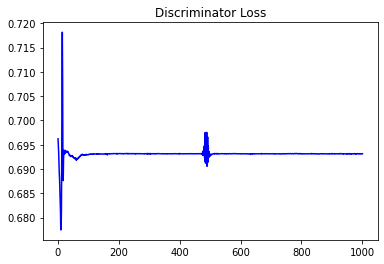

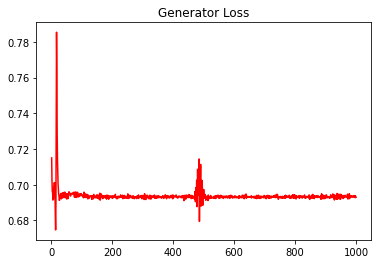

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.17479334829301135


#### Sanity Checks 

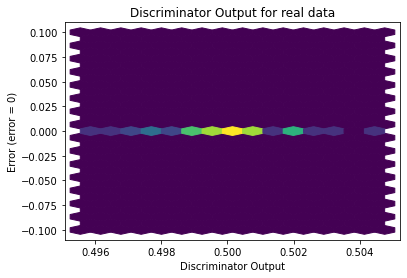

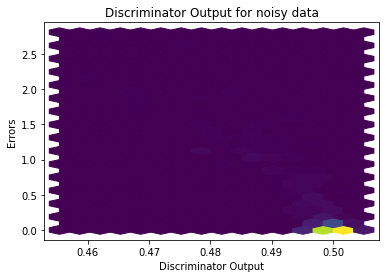

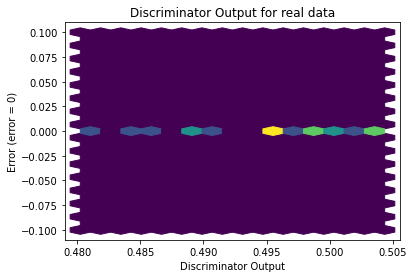

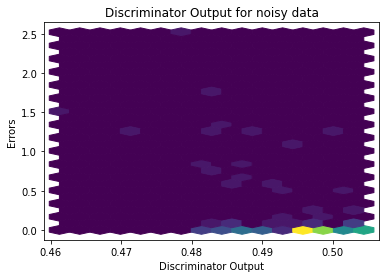

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


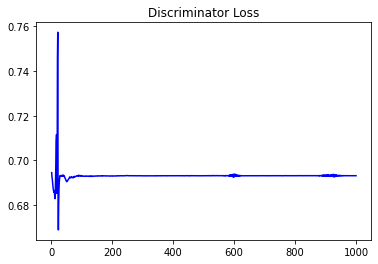

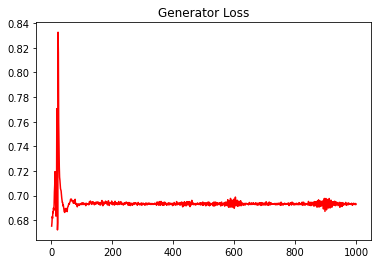

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20874746859753399


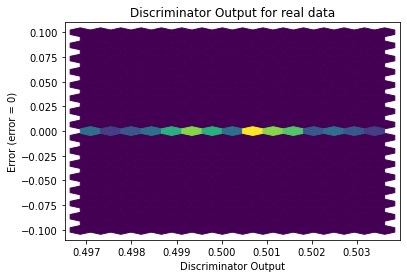

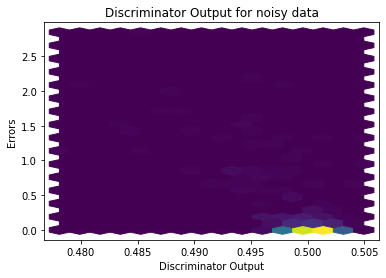

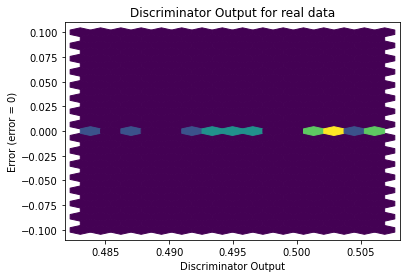

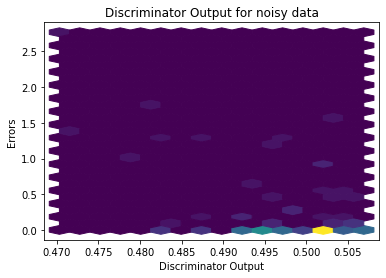

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4182]], device='cuda:0', requires_grad=True)
